In [1]:
import numba
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
@numba.njit
def velocity(z1,z0,gamma):
    """
    parameters:
    
    z0 : position of the vortex
    z1 : complex point where velocity is to be calculated
    gamma : strength of the vortex placed at z0
    
    Returns:
    vel : velocity at point z1 due to the vortex placed at z0
    """
    dz = z1 -z0
    
    phi = (((-1*gamma*dz)/(2*np.pi))*(1/(np.abs(dz)**2)))*complex(0,-1) #(-gamma/(2*np.pi*(z1 - z0 )))*complex(0,1)
    
    u = phi.real
    v = (-1)*phi.imag
    
    return u , -1*v
    

In [9]:
# sanity check 
# for z0 = 0 , z1 = 1 
# u = 0 , v ~ 0.159 (using pi = 3.14)
gamma = 1
z0 = 0 +0j
z1 = 1 +0j

velocity(z1,z0,gamma)

(0.0, 0.15915494309189535)

In [10]:
@numba.njit
def euler_update( x , v , dt):
    return x + v*dt

In [11]:
# sanity check 
# out = 1.5 + 1.5j
euler_update(0.5 + 0.5j,1 + 1j,1)

(1.5+1.5j)

In [12]:
path1 = []
path2 = []

z1 = -0.5 + 0j
z2 = 0.5 + 0j

path1.append(z1)
path2.append(z2)

gamma1 = 1
gamma2 = 1

dt = 0.1
num_iter = 100

for t in range(num_iter):
    
    u1 , v1 = velocity(z2,z1,gamma2)
    u2 , v2 = velocity(z1,z2,gamma1)
    
    z1 = euler_update(z1,complex(u1,v1),dt)
    z2 = euler_update(z2,complex(u2,v2),dt)
    
    path1.append(z1)
    path2.append(z2)
    

print(len(path1),len(path2))
print(path1[-1],path2[-1])

101 101
(0.5207415414760543+0.05478632859393382j) (-0.5207415414760543-0.05478632859393382j)


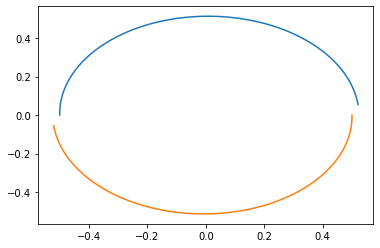

In [13]:
plt.plot(np.array(path1[:]).real,np.array(path1[:]).imag)
plt.plot(np.array(path2[:]).real,np.array(path2[:]).imag)
plt.show()

In [14]:
@numba.njit
def net_velocity(vortex, vortexs, gammas):
    u = 0
    v = 0
    curr_idx = np.argmin(np.abs(vortexs - vortex))
    for i,z0 in enumerate(vortexs):
        if curr_idx != i :
#             print(i , gammas[i], "debug")
            u_temp , v_temp  = velocity(vortex,z0,gammas[i])
            u = u + u_temp
            v = v + v_temp
    return complex(u , v)

In [15]:
@numba.njit
def rk2_update(x,u1,u2,dt):
    return x + (dt/2)*(u1 + u2)
    

In [16]:
@numba.njit
def simulate(vortexs , gammas , num_iter , dt , mode="euler" ):
    num_vortex = len(vortexs)
    path = np.zeros((num_iter,num_vortex),dtype=np.complex128)
    path[0,:] = vortexs.copy()
    
    if mode == "euler":
        for t in range(num_iter):
            vel = np.zeros(num_vortex,dtype=np.complex128)
            for i,vortex in enumerate(vortexs):
                vel[i] = net_velocity(vortex,vortexs,gammas)
            vortexs = euler_update(vortexs,vel,dt)
            path[t,:] = vortexs.copy()
        
        return path
        
    elif mode == "rk2":
        for t in range(num_iter):
            u1 =  np.zeros(num_vortex,dtype=np.complex128)
            u2 = np.zeros(num_vortex,dtype=np.complex128)
            for i,vortex in enumerate(vortexs):
                u1[i] = net_velocity(vortex,vortexs,gammas)
                vortex_temp = euler_update(vortex,u1[i],dt)
                u2[i] = net_velocity(vortex_temp,vortexs,gammas)
            vortexs = rk2_update(vortexs,u1,u2,dt)
            path[t,:] = vortexs.copy()
            
        return path

In [17]:
def plot(path):
    plt.plot(path[:,:].real,path[:,:].imag)

time taken :  4.986246824264526


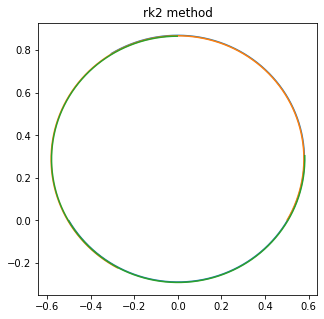

In [18]:
vortexs = np.array([-0.5 + 0.0j , +0.5 + 0.0j, complex(0.0 , np.sqrt(3/4))])
gammas = np.array([1.,1.,1.0])
num_iter = 1000
dt = 0.01

import time

a = time.time()

# plt.figure()
# path = simulate(vortexs , gammas , num_iter , dt, mode="euler")
# plt.title("Euler method")
# plot(path)

plt.figure(figsize=(5,5))
path = simulate(vortexs , gammas , num_iter , dt, mode="rk2")
plt.title("rk2 method")
plot(path)

print("time taken : ", time.time() - a)

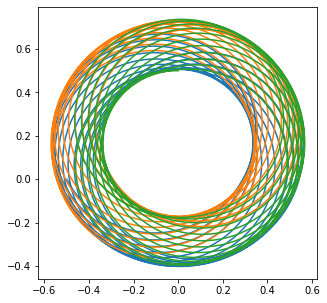

In [20]:
vortexs = np.array([-0.5 + 0.0j , +0.5 + 0.0j, 0.0 + 0.5j ])
gammas = np.array([1.,1.,1.])
num_iter = 100000
dt = 0.001

# plt.figure(figsize=(5,5))
# path = simulate(vortexs , gammas , num_iter , dt, mode="euler")
# plot(path)

plt.figure(figsize=(5,5))
path = simulate(vortexs , gammas , num_iter , dt, mode="rk2")
plot(path)

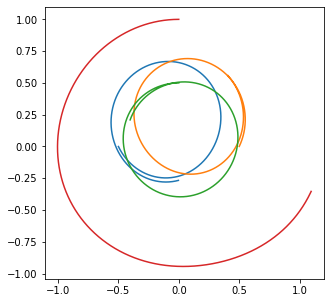

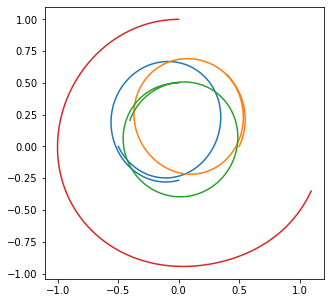

In [21]:
vortexs = np.array([-0.5 + 0.0j , +0.5 + 0.0j, 0.0 + 0.5j, 0.0 + 1.0j ])
gammas = np.array([1.,1.,1.])
num_iter = 10000
dt = 0.001

plt.figure(figsize=(5,5))
path = simulate(vortexs , gammas , num_iter , dt, mode="euler")
plot(path)

plt.figure(figsize=(5,5))
path = simulate(vortexs , gammas , num_iter , dt, mode="rk2")
plot(path)

[ 4.  1.  2.  3.  4.  5. -1.]


6